In [3]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
movie_data_train_path = Path("source_data/movie_data_train.csv")
movie_data_test_path = Path("source_data/movie_data_test.csv")

movie_data_train_df = pd.read_csv(movie_data_train_path)
movie_data_test_df = pd.read_csv(movie_data_test_path)

y_train = movie_data_train_df["popularity"]
X_train = movie_data_train_df.drop(columns=["popularity", "profit", "roi", "revenue", "vote_average"])

y_test = movie_data_test_df["popularity"]
X_test = movie_data_test_df.drop(columns=["popularity", "profit", "roi", "revenue", "vote_average"])

median_train_value = y_train.median()
y_train = y_train.apply(lambda x: 1 if x > median_train_value else 0)

median_test_value = y_test.median()
y_test = y_test.apply(lambda x: 1 if x > median_test_value else 0)



In [5]:
X_train.head()


,budget,runtime,genres_0_name_Action,genres_0_name_Adventure,genres_0_name_Animation,genres_0_name_Comedy,genres_0_name_Crime,genres_0_name_Documentary,genres_0_name_Drama,genres_0_name_Family,...,genres_2_name_History,genres_2_name_Horror,genres_2_name_Music,genres_2_name_Mystery,genres_2_name_Romance,genres_2_name_Science Fiction,genres_2_name_TV Movie,genres_2_name_Thriller,genres_2_name_War,genres_2_name_Western
0,9000000.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1200000.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15000000.0,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6000000.0,94.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80000000.0,117.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(balanced_accuracy_score(y_test, y_test_pred))


0.6418165045811314


In [7]:
print(f'Classification Report: \r\n{classification_report(y_test, y_test_pred)}')
#movie_conf_matrix

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       566
           1       0.68      0.54      0.60       565

    accuracy                           0.64      1131
   macro avg       0.65      0.64      0.64      1131
weighted avg       0.65      0.64      0.64      1131



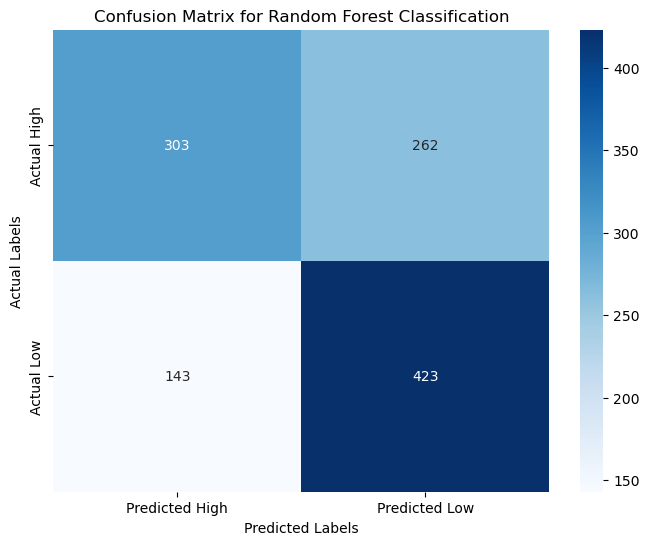

In [8]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=[1, 0])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted High', 'Predicted Low'], 
            yticklabels=['Actual High', 'Actual Low'])
plt.title("Confusion Matrix for Random Forest Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [9]:
feature_importances = clf.feature_importances_
importances_sorted = sorted(zip(feature_importances, X_test), reverse=True)
importances_sorted[:14]

[(0.421663899794958, 'budget'),
 (0.17334586553233347, 'runtime'),
 (0.030042684932390065, 'genres_0_name_Drama'),
 (0.023524165594413976, 'genres_0_name_Horror'),
 (0.01787641083731764, 'genres_0_name_Animation'),
 (0.01671229134847435, 'genres_2_name_Fantasy'),
 (0.016406184591058602, 'genres_2_name_Science Fiction'),
 (0.014814420990908978, 'genres_1_name_Drama'),
 (0.014295981245224383, 'genres_1_name_Thriller'),
 (0.013380753514591436, 'genres_1_name_Action'),
 (0.011662709792968897, 'genres_0_name_Adventure'),
 (0.011421376153437877, 'genres_2_name_Adventure'),
 (0.010960731884378119, 'genres_1_name_nan'),
 (0.010783704290694557, 'genres_0_name_Thriller')]

<Axes: xlabel='max_depth'>

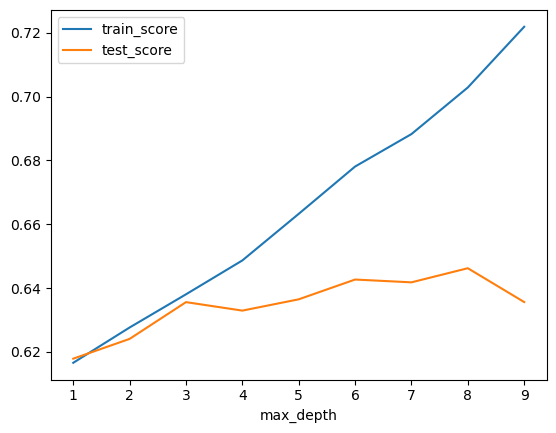

In [10]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

models_df.plot(x='max_depth')